# DATA EXPLORATION WITH PYTHON
### House Prices - Advanced Regression Techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
#import the train data
data=pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

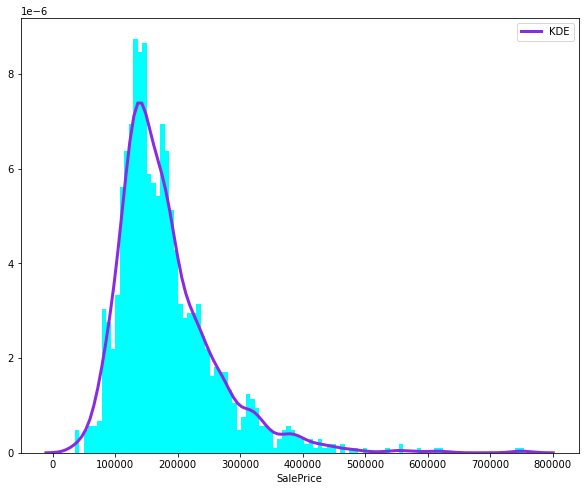

In [5]:
plt.figure(figsize=(10,8))
sns.distplot(data['SalePrice'],kde=True,rug_kws={"color": "g"},kde_kws={"color": "blueviolet", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "bar", "linewidth": 3,"alpha": 1, "color": "aqua"},bins=100 )

In [6]:
#lets check the skewness and kurtosis
print( 'Skewness : %f' % data['SalePrice'].skew())
print('Kurtosis: %f' % data['SalePrice'].kurt() )

Skewness : 1.882876
Kurtosis: 6.536282


In [7]:
data[['GrLivArea','SalePrice']]

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
...,...,...
1455,1647,175000
1456,2073,210000
1457,2340,266500
1458,1078,142125


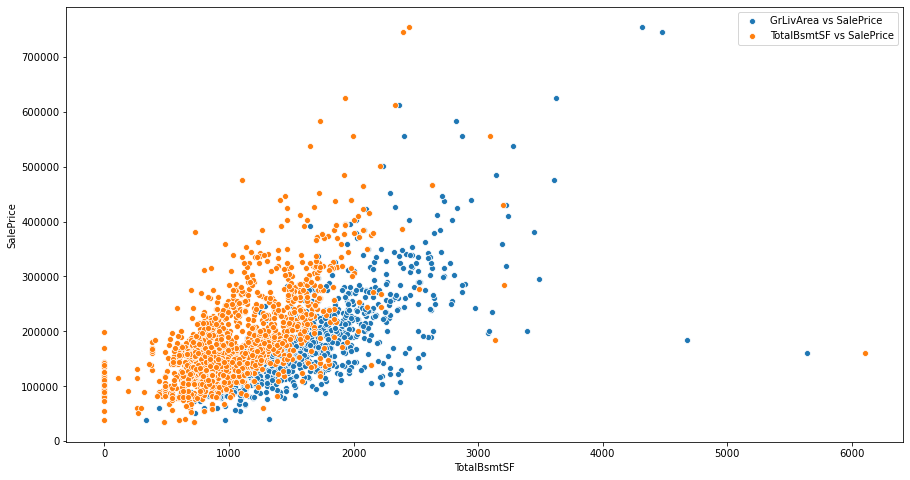

In [8]:
#relation between GrLivArea vs SalePrice
#and relation between TotalBsmtSF vs SalePrice
fig, a=plt.subplots(1,1,figsize=(15,8))
sns.scatterplot(x=data['GrLivArea'],y=data['SalePrice'],sizes=(20,200),label='GrLivArea vs SalePrice',palette="deep")
sns.scatterplot(x=data['TotalBsmtSF'],y=data['SalePrice'],sizes=(20,200),label='TotalBsmtSF vs SalePrice',palette="deep")
legend='label'
#sns.lineplot(x=data['GrLivArea'],y=data['SalePrice'])

In [9]:
data['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

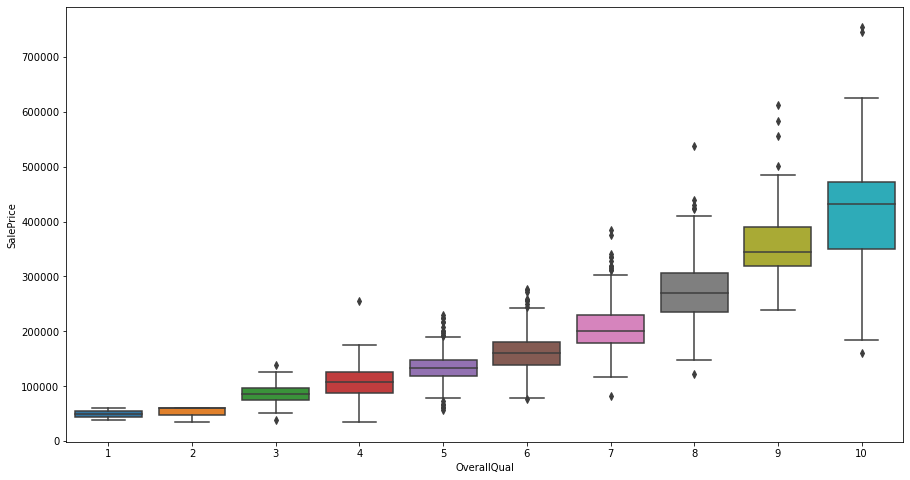

In [10]:
fig, b=plt.subplots(1,1,figsize=(15,8))
sns.boxplot('OverallQual','SalePrice',data=data)
#sns.stripplot('OverallQual','SalePrice',data=data,alpha=.5)

In [11]:
#correlation matrix
x=data.corr()
x

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


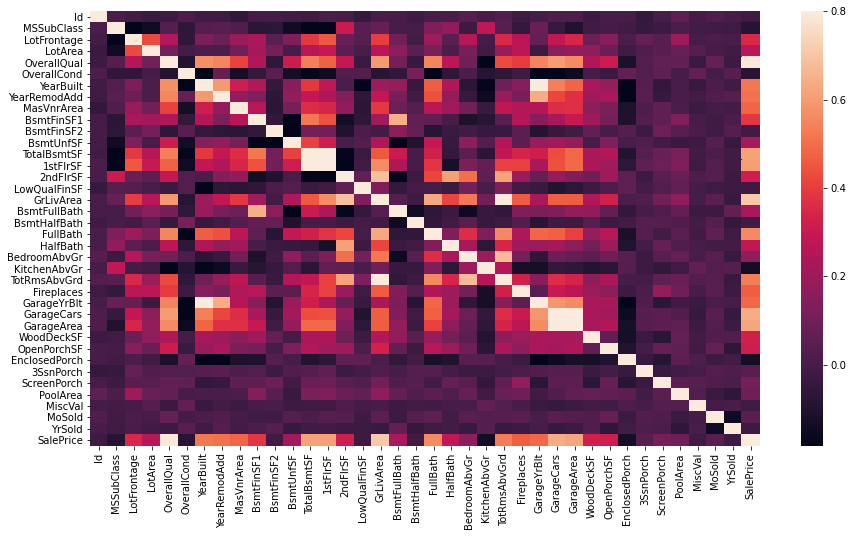

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(x,vmax=.8,robust=True)

In [13]:
#x.nlargest(10, 'SalePrice')['SalePrice'].index

In [14]:
new_x=x.nlargest(10,'SalePrice')['SalePrice'].index


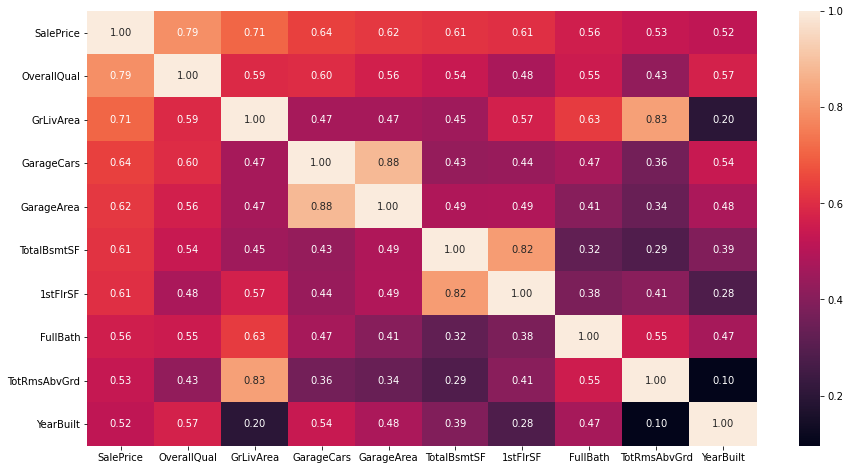

In [15]:
#.T transform data
plt.figure(figsize=(15,8))
cm=np.corrcoef(data[new_x].values.T)
sns.heatmap(cm, cbar=True,annot=True,fmt='.2f',annot_kws={'size':10},yticklabels=new_x.values, xticklabels=new_x.values)

/Users/adnanfaruk/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


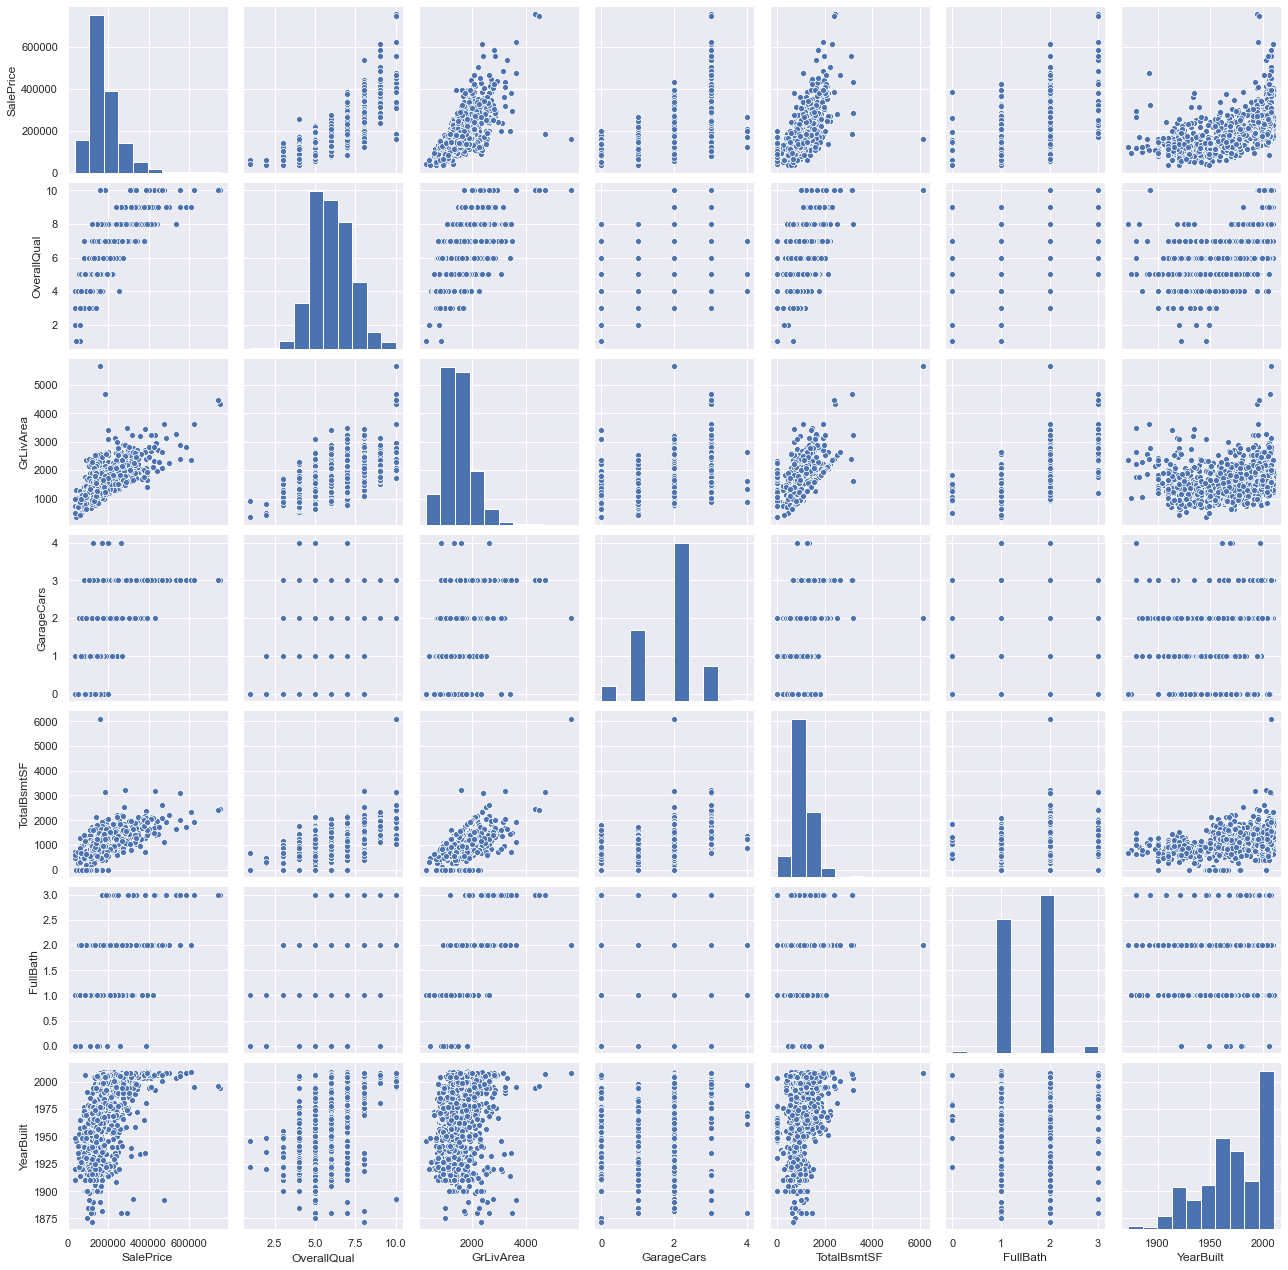

In [16]:
sns.set()
nex_xs=data[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
sns.pairplot(nex_xs,size=2.5)

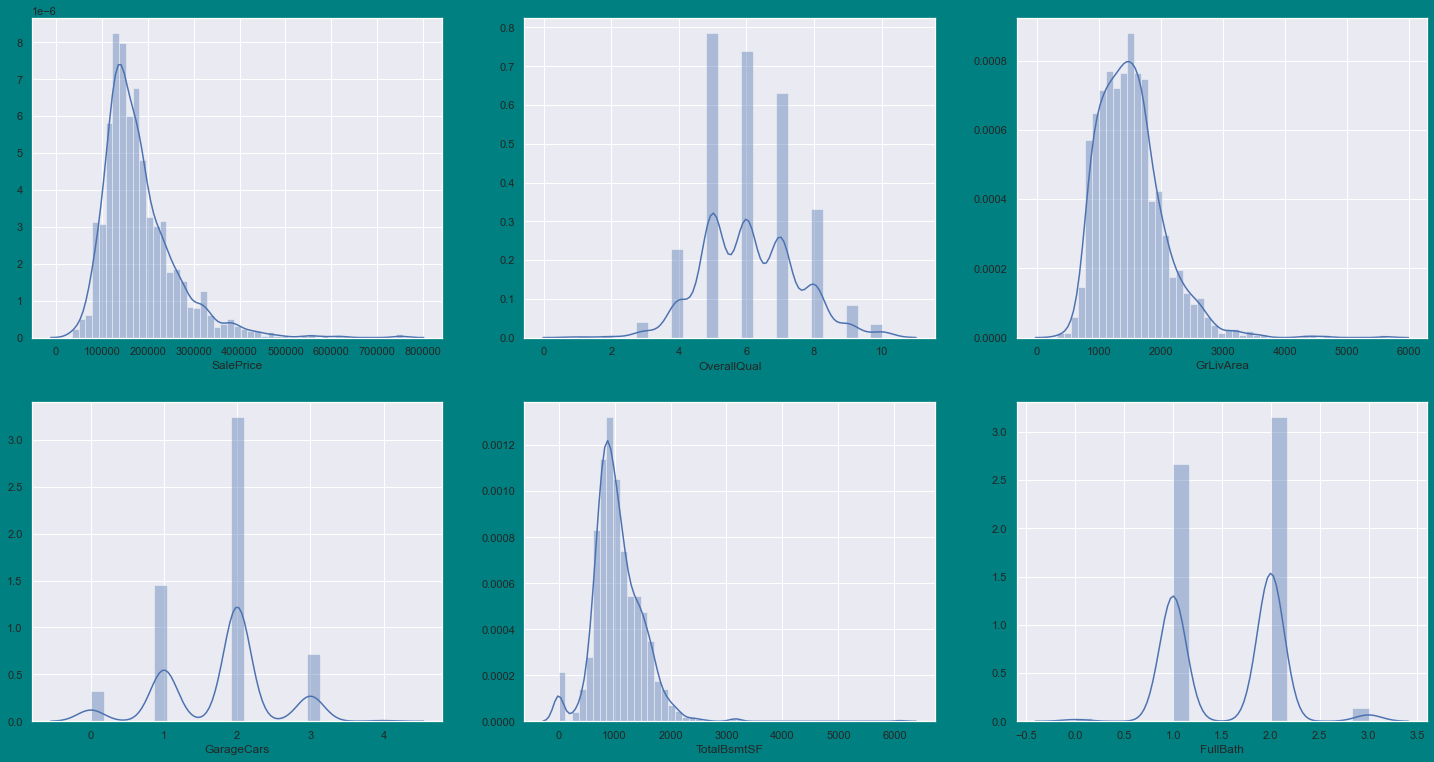

In [65]:
new=data[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
plt.figure(figsize=(25,20),facecolor='teal')
plotnum=1
for column in new:
    if plotnum<7:
        a=plt.subplot(3,3,plotnum)
        sns.distplot(new[column])
        plotnum+=1
plt.show()


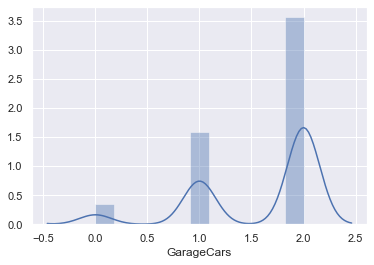

In [73]:
#Data cleaning 
q=data['GarageCars'].quantile(0.95)

data_cleand=data[data['GarageCars']<q]
sns.distplot(data_cleand['GarageCars'])

In [17]:
#find the missing data 
missing =data.isnull().sum().sort_values(ascending=False)
missing

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [18]:

per=data.isnull().sum()/data.isnull().count()
percentage=per.sort_values(ascending= False)
percentage

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 81, dtype: float64

In [19]:
miss2=pd.concat([missing,percentage],axis=1,keys=['missing','percentage']).head(20)

miss2

,missing,percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [20]:
miss2.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical', 'Utilities'],
      dtype='object')

In [21]:
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage','GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual','MasVnrArea', 'MasVnrType'],inplace=True,axis=1)

In [22]:
#replace the NaN by 0
data.head()
data['Electrical']=data['Electrical'].fillna(0)

In [23]:
#check if missing data exist 
data.isnull().sum().max()

0

In [24]:
# to avoid outlir problem we are going to standarized the data
#standardizing data
salesscal_std=StandardScaler().fit_transform(data['SalePrice'][:,np.newaxis])
salesscal_std



array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [25]:
a=data['SalePrice'].quantile(0.95)

In [26]:
data[data['SalePrice']>a]['SalePrice']

11      345000
53      385000
58      438780
112     383970
151     372402
         ...  
1353    410000
1373    466500
1388    377500
1417    340000
1437    394617
Name: SalePrice, Length: 73, dtype: int64

In [27]:
#outlir remove 
nex_xs

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,208500,7,1710,2,856,2,2003
1,181500,6,1262,2,1262,2,1976
2,223500,7,1786,2,920,2,2001
3,140000,7,1717,3,756,1,1915
4,250000,8,2198,3,1145,2,2000
...,...,...,...,...,...,...,...
1455,175000,6,1647,2,953,2,1999
1456,210000,6,2073,2,1542,2,1978
1457,266500,7,2340,1,1152,2,1941
1458,142125,5,1078,1,1078,1,1950


# outlir remove 

In [28]:
q=nex_xs.quantile(0.95)
q

SalePrice      326100.0
OverallQual         8.0
GrLivArea        2466.1
GarageCars          3.0
TotalBsmtSF      1753.0
FullBath            2.0
YearBuilt        2007.0
Name: 0.95, dtype: float64

In [29]:
#outlir remove 
q=nex_xs['SalePrice'].quantile(0.95)
data_cleand=data[data['SalePrice' ]<q]['SalePrice']
data_cleand


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1387, dtype: int64

In [ ]:
import sklearn.